## Explolatory Data Analysis For Landslide Prevention and Innovation Dataset

### Understand The Problem Statement

The core of our project is to design and shape the future of landslide prevention and management with the example of Hong Kong.

Hong Kong is one of the hilliest and most densely populated cities in the world which is frequently hit by extreme rainfall and is therefore highly susceptible to rain-induced landslides. A landslide is the movement of masses of rock, debris, or earth down a slope and can result in significant loss of life and property. A high-quality landslide inventory is essential not only for landslide hazard and risk analysis but also for supporting agency decisions on landslide hazard mitigation and prevention.

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming

### Type of the Problem
It is a classification problem where we have to automate landslide identification using artificial intelligence techniques

### Load Python Packages

In [1]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import joblib

## Load Dataset

In [2]:
# Import data
new_data= pd.read_csv('Train.csv')


In [3]:
# print shape 
print('train data shape :', new_data.shape)

train data shape : (10864, 227)


The above output show the number of rows and columns for dataset 

In [4]:
# Inspect Data by shing the first five rows 
new_data.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,...,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693,0
1,2,161,158,155,153,151,162,159,155,153,...,1.359639,1.359608,1.359587,1.359556,1.359683,1.359662,1.359631,1.359610,1.359579,1
2,3,149,151,154,156,158,154,157,158,160,...,1.365005,1.365025,1.365055,1.365075,1.364937,1.364967,1.364988,1.365018,1.365038,0
3,4,80,78,77,75,73,80,78,77,75,...,1.100708,1.100738,1.100759,1.100789,1.100630,1.100650,1.100680,1.100700,1.100731,0
4,5,117,115,114,112,110,115,113,111,110,...,1.284180,1.284130,1.284056,1.284006,1.284125,1.284050,1.284001,1.283926,1.283876,0


### Explolatory Data Analysis 

This is the process of finding some insights from you dataset before create predictive models.


In [5]:
#show list of columns 
list(new_data.columns)  

['Sample_ID',
 '1_elevation',
 '2_elevation',
 '3_elevation',
 '4_elevation',
 '5_elevation',
 '6_elevation',
 '7_elevation',
 '8_elevation',
 '9_elevation',
 '10_elevation',
 '11_elevation',
 '12_elevation',
 '13_elevation',
 '14_elevation',
 '15_elevation',
 '16_elevation',
 '17_elevation',
 '18_elevation',
 '19_elevation',
 '20_elevation',
 '21_elevation',
 '22_elevation',
 '23_elevation',
 '24_elevation',
 '25_elevation',
 '1_slope',
 '2_slope',
 '3_slope',
 '4_slope',
 '5_slope',
 '6_slope',
 '7_slope',
 '8_slope',
 '9_slope',
 '10_slope',
 '11_slope',
 '12_slope',
 '13_slope',
 '14_slope',
 '15_slope',
 '16_slope',
 '17_slope',
 '18_slope',
 '19_slope',
 '20_slope',
 '21_slope',
 '22_slope',
 '23_slope',
 '24_slope',
 '25_slope',
 '1_aspect',
 '2_aspect',
 '3_aspect',
 '4_aspect',
 '5_aspect',
 '6_aspect',
 '7_aspect',
 '8_aspect',
 '9_aspect',
 '10_aspect',
 '11_aspect',
 '12_aspect',
 '13_aspect',
 '14_aspect',
 '15_aspect',
 '16_aspect',
 '17_aspect',
 '18_aspect',
 '19_aspect

In [6]:
## show Some information about the dataset 
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Columns: 227 entries, Sample_ID to Label
dtypes: float64(175), int64(52)
memory usage: 18.8 MB
None


The outshow shows the list of variables , sizes and data types in each variables. This will help us to know what feature engineering you can apply.

In [7]:
# Check for missing values
print('missing values:', new_data.isnull().sum())
print('')
print('Total number of missing values is:', new_data.isnull().sum().sum())

missing values: Sample_ID      0
1_elevation    0
2_elevation    0
3_elevation    0
4_elevation    0
              ..
22_sdoif       0
23_sdoif       0
24_sdoif       0
25_sdoif       0
Label          0
Length: 227, dtype: int64

Total number of missing values is: 0


We don't have missing data in our dataset.

### FEATURE ENGINEERING 

In [8]:
#remove id feature 

data = new_data.drop(['Sample_ID','1_elevation','2_elevation','3_elevation','4_elevation','5_elevation','6_elevation','7_elevation','8_elevation','9_elevation','10_elevation','11_elevation','12_elevation','14_elevation','15_elevation','16_elevation','17_elevation','18_elevation','19_elevation','20_elevation','21_elevation','22_elevation','23_elevation','24_elevation','25_elevation','1_slope','2_slope','3_slope','4_slope','5_slope','6_slope','7_slope','8_slope','9_slope','10_slope','11_slope','12_slope','14_slope','15_slope','16_slope','17_slope','18_slope','19_slope','20_slope','21_slope','22_slope','23_slope','24_slope','25_slope','1_aspect','2_aspect','3_aspect','4_aspect','5_aspect','6_aspect','7_aspect','8_aspect','9_aspect','10_aspect','11_aspect','12_aspect','14_aspect','15_aspect','16_aspect','17_aspect','18_aspect','19_aspect','20_aspect','21_aspect','22_aspect','23_aspect','24_aspect','25_aspect','1_placurv','2_placurv','3_placurv','4_placurv','5_placurv','6_placurv','7_placurv','8_placurv','9_placurv','10_placurv','11_placurv','12_placurv','14_placurv','15_placurv','16_placurv','17_placurv','18_placurv','19_placurv','20_placurv','21_placurv','22_placurv','23_placurv','24_placurv','25_placurv','1_procurv','2_procurv','3_procurv','4_procurv','5_procurv','6_procurv','7_procurv','8_procurv','9_procurv','10_procurv','11_procurv','12_procurv','14_procurv','15_procurv','16_procurv','17_procurv','18_procurv','19_procurv','20_procurv','21_procurv','22_procurv','23_procurv','24_procurv','25_procurv','1_lsfactor','2_lsfactor','3_lsfactor','4_lsfactor','5_lsfactor','6_lsfactor','7_lsfactor','8_lsfactor','9_lsfactor','10_lsfactor','11_lsfactor','12_lsfactor','14_lsfactor','15_lsfactor','16_lsfactor','17_lsfactor','18_lsfactor','19_lsfactor','20_lsfactor','21_lsfactor','22_lsfactor','23_lsfactor','24_lsfactor','25_lsfactor','1_twi','2_twi','3_twi','4_twi','5_twi','6_twi','7_twi','8_twi','9_twi','10_twi','11_twi','12_twi','14_twi','15_twi','16_twi','17_twi','18_twi','19_twi','20_twi','21_twi','22_twi','23_twi','24_twi','25_twi','1_geology','2_geology','3_geology','4_geology','5_geology','6_geology','7_geology','8_geology','9_geology','10_geology','11_geology','12_geology','14_geology','15_geology','16_geology','17_geology','18_geology','19_geology','20_geology','21_geology','22_geology','23_geology','24_geology','25_geology','1_sdoif','2_sdoif','3_sdoif','4_sdoif','5_sdoif','6_sdoif','7_sdoif','8_sdoif','9_sdoif','10_sdoif','11_sdoif','12_sdoif','14_sdoif','15_sdoif','16_sdoif','17_sdoif','18_sdoif','19_sdoif','20_sdoif','21_sdoif','22_sdoif','23_sdoif','24_sdoif','25_sdoif',], axis=1)

data.shape 

(10864, 10)

In [9]:
#remove id feature 

data5 = new_data.drop(['Sample_ID','1_elevation','2_elevation','3_elevation','4_elevation','5_elevation','6_elevation','7_elevation','8_elevation','9_elevation','10_elevation','11_elevation','12_elevation','14_elevation','15_elevation','16_elevation','17_elevation','18_elevation','19_elevation','20_elevation','21_elevation','22_elevation','23_elevation','24_elevation','25_elevation','1_slope','2_slope','3_slope','4_slope','5_slope','6_slope','7_slope','8_slope','9_slope','10_slope','11_slope','12_slope','14_slope','15_slope','16_slope','17_slope','18_slope','19_slope','20_slope','21_slope','22_slope','23_slope','24_slope','25_slope','1_aspect','2_aspect','3_aspect','4_aspect','5_aspect','6_aspect','7_aspect','8_aspect','9_aspect','10_aspect','11_aspect','12_aspect','14_aspect','15_aspect','16_aspect','17_aspect','18_aspect','19_aspect','20_aspect','21_aspect','22_aspect','23_aspect','24_aspect','25_aspect','1_placurv','2_placurv','3_placurv','4_placurv','5_placurv','6_placurv','7_placurv','8_placurv','9_placurv','10_placurv','11_placurv','12_placurv','14_placurv','15_placurv','16_placurv','17_placurv','18_placurv','19_placurv','20_placurv','21_placurv','22_placurv','23_placurv','24_placurv','25_placurv','1_procurv','2_procurv','3_procurv','4_procurv','5_procurv','6_procurv','7_procurv','8_procurv','9_procurv','10_procurv','11_procurv','12_procurv','14_procurv','15_procurv','16_procurv','17_procurv','18_procurv','19_procurv','20_procurv','21_procurv','22_procurv','23_procurv','24_procurv','25_procurv','1_lsfactor','2_lsfactor','3_lsfactor','4_lsfactor','5_lsfactor','6_lsfactor','7_lsfactor','8_lsfactor','9_lsfactor','10_lsfactor','11_lsfactor','12_lsfactor','14_lsfactor','15_lsfactor','16_lsfactor','17_lsfactor','18_lsfactor','19_lsfactor','20_lsfactor','21_lsfactor','22_lsfactor','23_lsfactor','24_lsfactor','25_lsfactor','1_twi','2_twi','3_twi','4_twi','5_twi','6_twi','7_twi','8_twi','9_twi','10_twi','11_twi','12_twi','14_twi','15_twi','16_twi','17_twi','18_twi','19_twi','20_twi','21_twi','22_twi','23_twi','24_twi','25_twi','1_geology','2_geology','3_geology','4_geology','5_geology','6_geology','7_geology','8_geology','9_geology','10_geology','11_geology','12_geology','14_geology','15_geology','16_geology','17_geology','18_geology','19_geology','20_geology','21_geology','22_geology','23_geology','24_geology','25_geology','1_sdoif','2_sdoif','3_sdoif','4_sdoif','5_sdoif','6_sdoif','7_sdoif','8_sdoif','9_sdoif','10_sdoif','11_sdoif','12_sdoif','14_sdoif','15_sdoif','16_sdoif','17_sdoif','18_sdoif','19_sdoif','20_sdoif','21_sdoif','22_sdoif','23_sdoif','24_sdoif','25_sdoif',], axis=1)

data5.columns 

Index(['13_elevation', '13_slope', '13_aspect', '13_placurv', '13_procurv',
       '13_lsfactor', '13_twi', '13_geology', '13_sdoif', 'Label'],
      dtype='object')

In [10]:
#show the first five rows after removing unneccessary columns
data.head()

,13_elevation,13_slope,13_aspect,13_placurv,13_procurv,13_lsfactor,13_twi,13_geology,13_sdoif,Label
0,119,44.56372,113.9625,0.017273,0.002025,11.035840,3.154479,3,1.281730,0
1,156,32.31153,198.4350,0.017014,-0.003220,9.067206,4.383853,3,1.359574,1
2,164,45.00000,270.0000,0.043121,0.025843,13.696470,4.169325,2,1.365050,0
3,77,16.69924,180.0000,0.032324,0.011816,3.400196,4.259946,2,1.100826,0
4,109,29.49621,135.0000,-0.007245,-0.012066,8.043085,4.430152,5,1.284217,0


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
oneHot = OneHotEncoder()

In [13]:
data2=oneHot.fit_transform(data['13_geology'].values.reshape(-1,1))

In [14]:
data2.shape

(10864, 7)

In [15]:
data2=pd.DataFrame(data2.toarray(),columns=oneHot.get_feature_names_out())

In [16]:
data2

,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
10859,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10860,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10861,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10862,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data =data.drop('13_geology',axis=1)

In [18]:
data=pd.concat([data,data2],axis=1)

In [19]:
joblib.dump(data,'/Users/Lenovo/Desktop/Project/preprocessing/one_hot_encoding.pkl')

['/Users/Lenovo/Desktop/Project/preprocessing/one_hot_encoding.pkl']

In [20]:
#show first five rows
data.head()

,13_elevation,13_slope,13_aspect,13_placurv,13_procurv,13_lsfactor,13_twi,13_sdoif,Label,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7
0,119,44.56372,113.9625,0.017273,0.002025,11.035840,3.154479,1.281730,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,156,32.31153,198.4350,0.017014,-0.003220,9.067206,4.383853,1.359574,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,164,45.00000,270.0000,0.043121,0.025843,13.696470,4.169325,1.365050,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,77,16.69924,180.0000,0.032324,0.011816,3.400196,4.259946,1.100826,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,109,29.49621,135.0000,-0.007245,-0.012066,8.043085,4.430152,1.284217,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
new_data.columns

Index(['Sample_ID', '1_elevation', '2_elevation', '3_elevation', '4_elevation',
       '5_elevation', '6_elevation', '7_elevation', '8_elevation',
       '9_elevation',
       ...
       '17_sdoif', '18_sdoif', '19_sdoif', '20_sdoif', '21_sdoif', '22_sdoif',
       '23_sdoif', '24_sdoif', '25_sdoif', 'Label'],
      dtype='object', length=227)

In [22]:
# show list of columns 

list(data.columns)

['13_elevation',
 '13_slope',
 '13_aspect',
 '13_placurv',
 '13_procurv',
 '13_lsfactor',
 '13_twi',
 '13_sdoif',
 'Label',
 'x0_1',
 'x0_2',
 'x0_3',
 'x0_4',
 'x0_5',
 'x0_6',
 'x0_7']

In [23]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))

data3 = scaler.fit_transform(data.drop('Label',axis=1).values.reshape(-1,1))

In [25]:
data=pd.DataFrame(data3.reshape(-1,15),columns=data.drop('Label',axis=1).columns)

In [42]:
data.columns

Index(['13_elevation', '13_slope', '13_aspect', '13_placurv', '13_procurv',
       '13_lsfactor', '13_twi', '13_sdoif', 'x0_1', 'x0_2', 'x0_3', 'x0_4',
       'x0_5', 'x0_6', 'x0_7'],
      dtype='object')

In [27]:
joblib.dump(scaler,'/Users/Lenovo/Desktop/Project/preprocessing/min-max-scaler2.pkl')

['/Users/Lenovo/Desktop/Project/preprocessing/min-max-scaler2.pkl']

In [28]:
#show shape 
data.shape  

(10864, 15)

In [29]:
#show first five rows 
data.head() 

,13_elevation,13_slope,13_aspect,13_placurv,13_procurv,13_lsfactor,13_twi,13_sdoif,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7
0,0.130646,0.049043,0.125124,0.000208,0.000191,0.012287,0.003647,0.001594,0.000189,0.000189,0.001285,0.000189,0.000189,0.000189,0.000189
1,0.171209,0.035611,0.217730,0.000207,0.000185,0.010129,0.004995,0.001679,0.000189,0.000189,0.001285,0.000189,0.000189,0.000189,0.000189
2,0.179979,0.049521,0.296185,0.000236,0.000217,0.015204,0.004759,0.001685,0.000189,0.001285,0.000189,0.000189,0.000189,0.000189,0.000189
3,0.084603,0.018496,0.197520,0.000224,0.000202,0.003916,0.004859,0.001395,0.000189,0.001285,0.000189,0.000189,0.000189,0.000189,0.000189
4,0.119684,0.032525,0.148187,0.000181,0.000175,0.009006,0.005045,0.001596,0.000189,0.000189,0.000189,0.000189,0.001285,0.000189,0.000189


In [30]:
# show data of the first row 
data[:1].values 

array([[0.13064645, 0.04904312, 0.12512392, 0.00020754, 0.00019082,
        0.01228702, 0.00364681, 0.00159374, 0.0001886 , 0.0001886 ,
        0.00128489, 0.0001886 , 0.0001886 , 0.0001886 , 0.0001886 ]])

### FEATURE SELECTIONS

#### Univariate Selection

In [31]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
data.shape

(10864, 15)

In [33]:
#split dataset into features and target
features = data.copy()

In [34]:
target=new_data['Label']

In [35]:
features.shape

(10864, 15)

In [36]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

#train to find best features
fit = bestfeatures.fit(features,target)

#save in the dataframe 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

#print 10 best features 
print(featureScores.nlargest(10,'Score'))  

           Specs     Score
0   13_elevation  6.864004
1       13_slope  6.138182
5    13_lsfactor  1.566501
10          x0_3  0.350141
6         13_twi  0.206482
9           x0_2  0.142376
2      13_aspect  0.131324
12          x0_5  0.081219
8           x0_1  0.054474
7       13_sdoif  0.000563


**Where:** 

**1:** Weathered Cretaceous granitic rocks
**2:** Weathered Jurassic granite rocks
**3:** Weathered Jurassic tuff and lava
**4:** Weathered Cretaceous tuff and lava
**5:** Quaternary deposits
**6:** Fill
**7:** Weathered Jurassic sandstone, siltstone and mudstone

**13_lsfactor** Length-slope factor  
**13_twi:** Topographic wetness index 
**13_sdoif** Step duration orographic intensification factor: 

In [37]:
# fit and tranform into the 10 best features 
transformer = SelectKBest(chi2, k=10)

#transform from 15 features into top 10 features
top_10_features = transformer.fit_transform(features, target)

#show the shape 
top_10_features.shape 

(10864, 10)

#### Feature Importance 


In [38]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

[1.28612245e-01 1.44137747e-01 8.52379891e-02 9.97336998e-02
 9.08263891e-02 1.38342253e-01 1.19995183e-01 1.23337262e-01
 3.97379253e-03 8.98402286e-03 4.82977737e-02 1.50649928e-04
 6.34770100e-03 3.81366979e-05 1.98515657e-03]


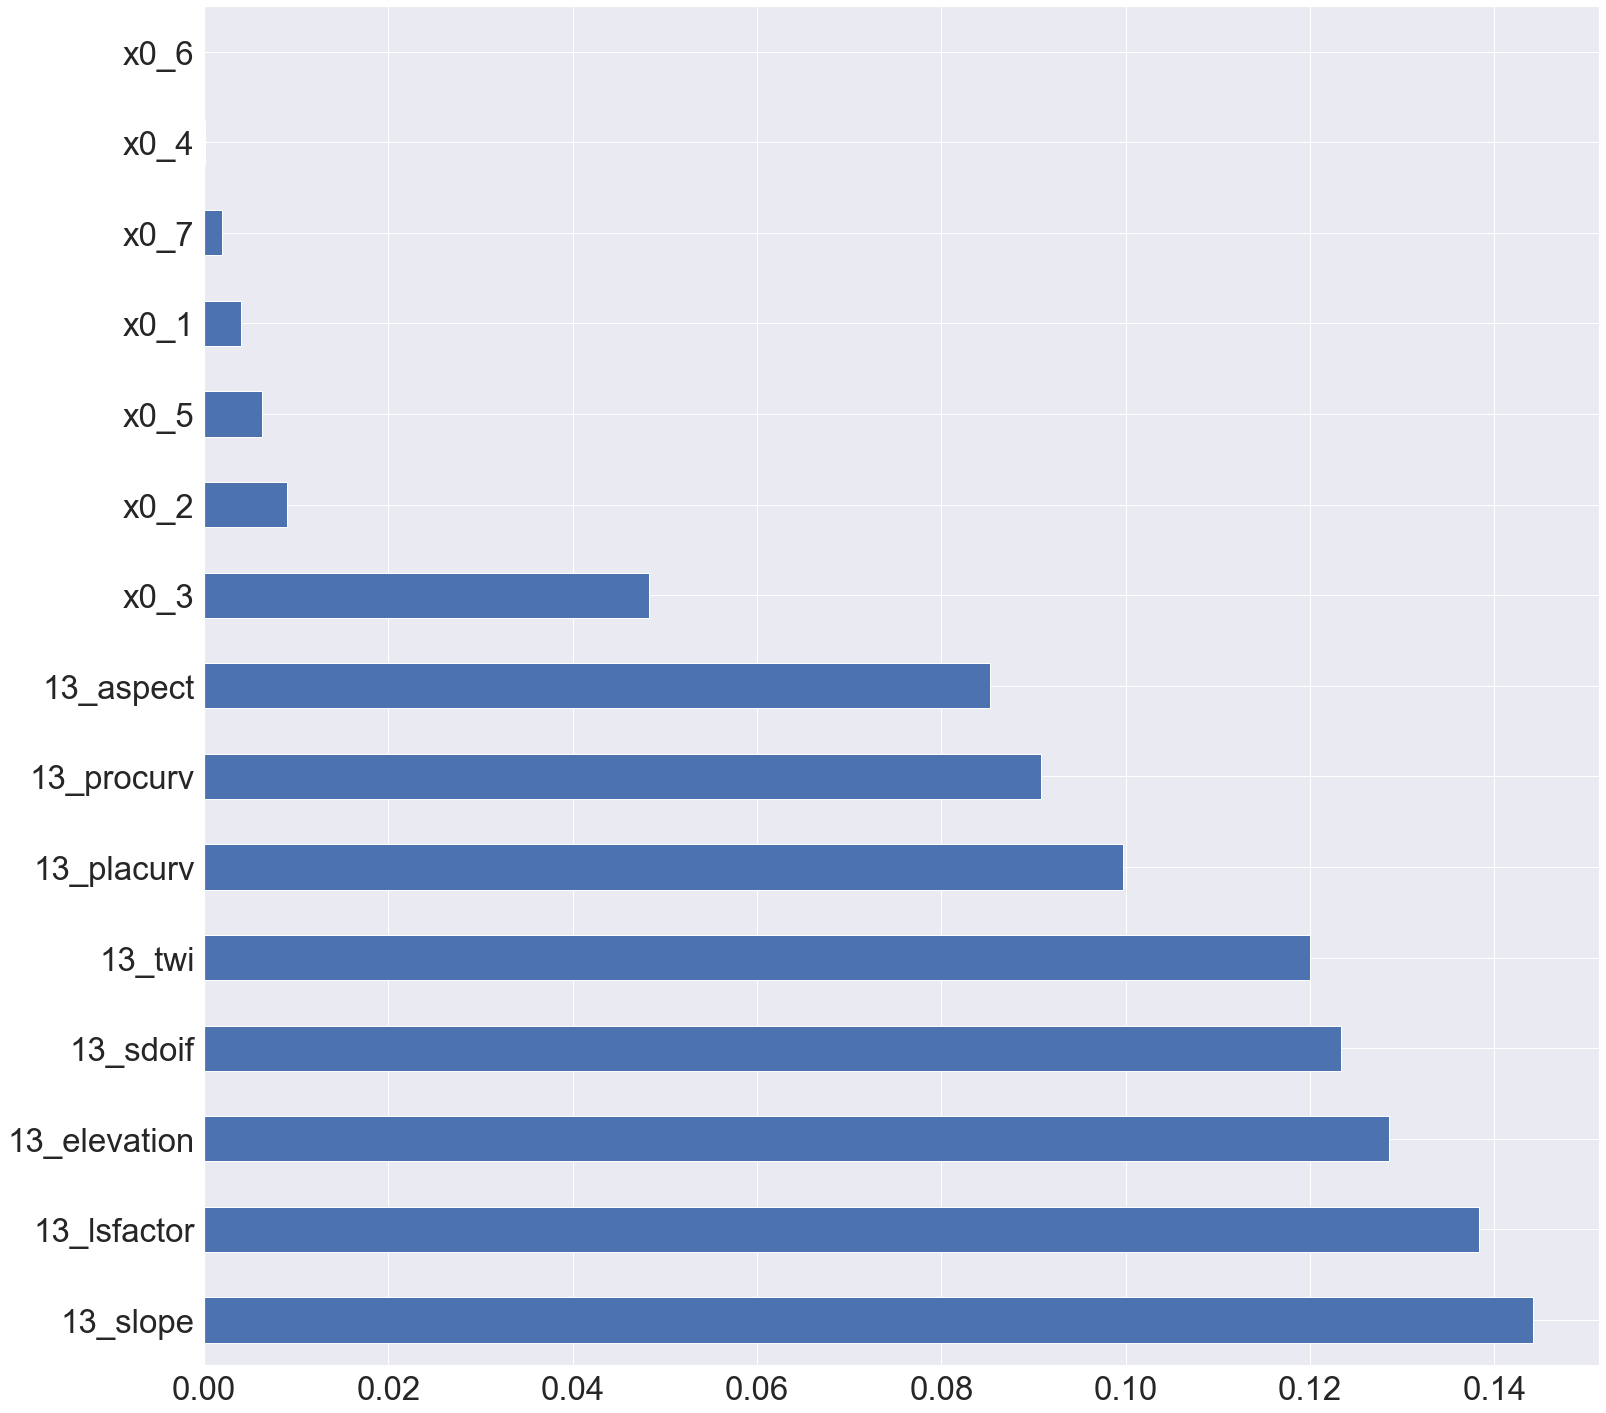

In [39]:
#create model for training 
model = RandomForestClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind='barh')
plt.show()

#### Correlation Matrix with Heatmap

<AxesSubplot:>

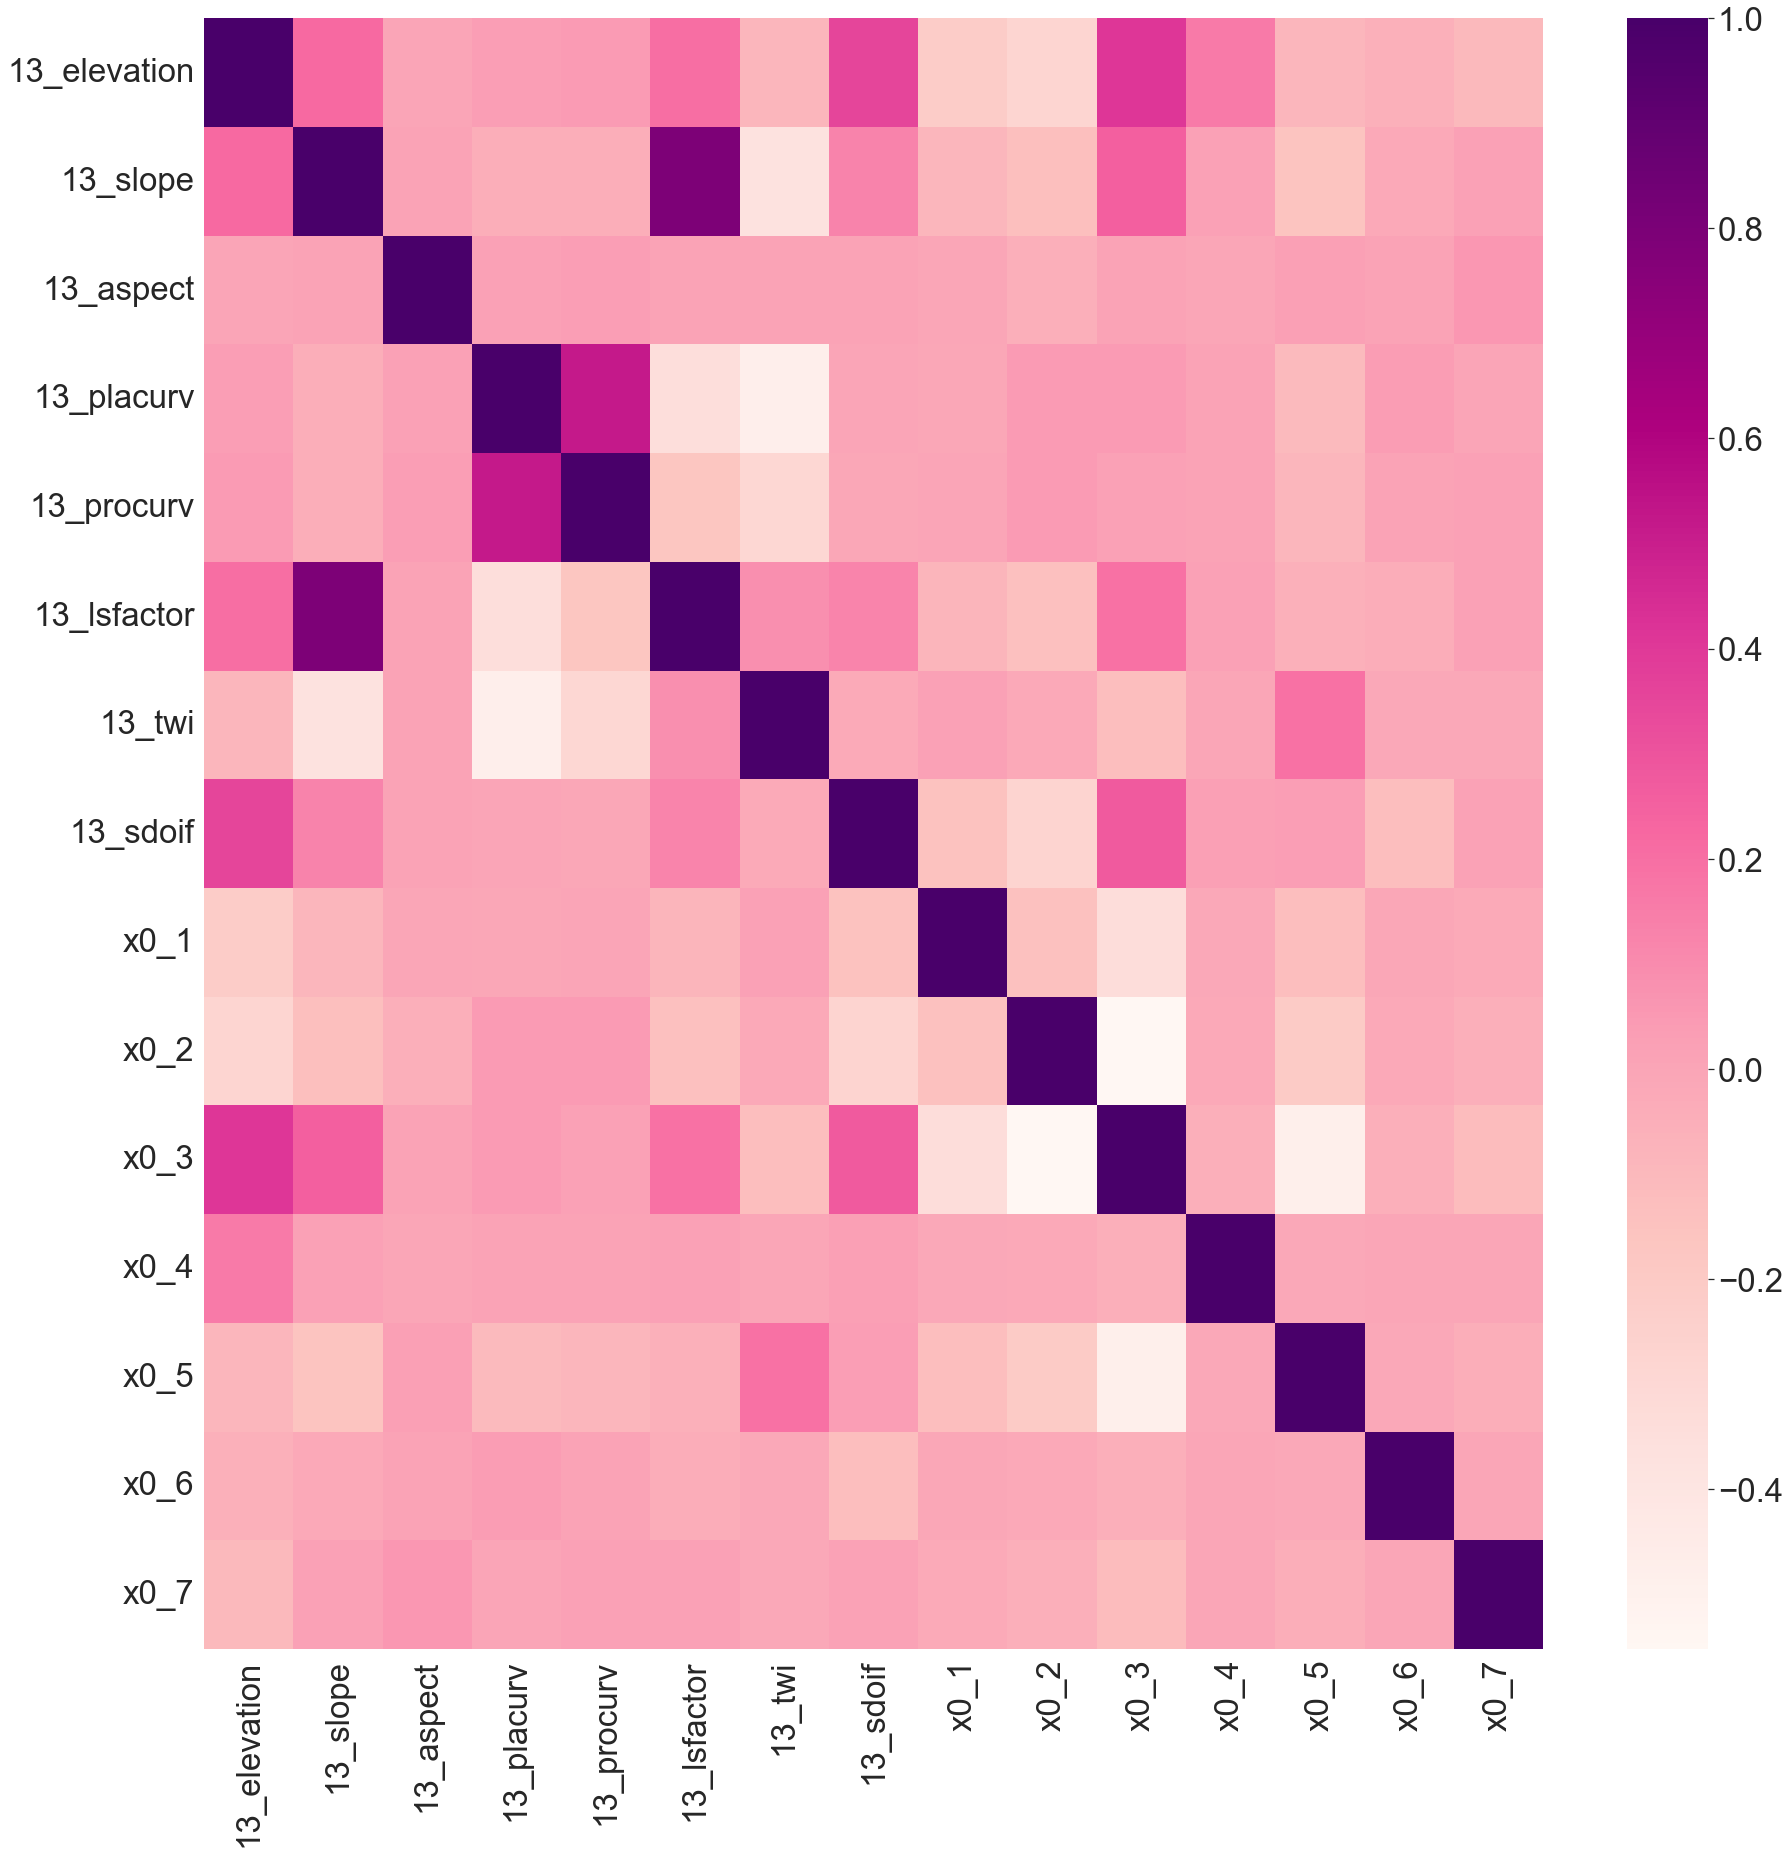

In [40]:
#get correlations of each features in dataset
plt.figure(figsize=(30,30))

#plot heat map
sns.set(font_scale = 3)
# to show number set annot=True
d = sns.heatmap(data.corr(),annot=False, cmap="RdPu")

#save the figure 
figure = d.get_figure()
figure.savefig("heatmap_output.png")

# show the heatamp graph 
d  

In [41]:
# SHOW CORRELATION OF DATA TO THE TARGET COLUMN 
features_corr = pd.DataFrame(abs(data.corr()['Label']).sort_values(ascending = False)) 

features_corr 

KeyError: 'Label'

### Using Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
model = LogisticRegression(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.75,test_size=0.25)

### 1st Evaluation Metric:  Accuracy

In [45]:
model.fit(X_train,y_train)
predictions=model.predict(X_test)
score=accuracy_score(y_test,predictions)
print(score)

0.7341678939617083


In [46]:
add_col=[]
for column in featureScores.nlargest(20,'Score')['Specs']:
    add_col.append(column)
    print(add_col)
    model.fit(X_train[add_col],y_train)
    predictions=model.predict(X_test[add_col])
    print(accuracy_score(y_test,predictions))

['13_elevation']
0.7341678939617083
['13_elevation', '13_slope']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi', 'x0_2']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi', 'x0_2', '13_aspect']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi', 'x0_2', '13_aspect', 'x0_5']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi', 'x0_2', '13_aspect', 'x0_5', 'x0_1']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi', 'x0_2', '13_aspect', 'x0_5', 'x0_1', '13_sdoif']
0.7341678939617083
['13_elevation', '13_slope', '13_lsfactor', 'x0_3', '13_twi', 'x0_2', '13_aspect', 'x0_5', 'x0_1', '13_sdoif', '13_placurv']
0.7341678939617083
['13_ele

### 2nd Evaluation Metric: Confusion Matrix 

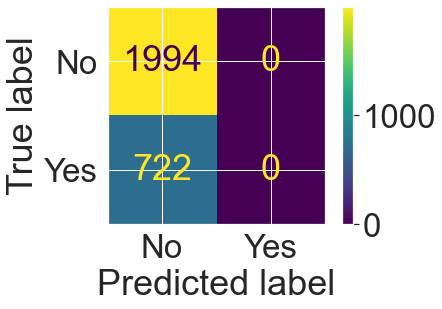

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute confusion matrix to evaluate the accuracy of a classification.
confusion_table = confusion_matrix(y_test, predictions)

#Confusion Matrix visualization.
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table,
                                    display_labels=['No', 'Yes'])
#create the plot
cm_display.plot()

#display the plot
plt.show()

### 3rd Evaluation Metric: F1 Score

In [48]:
from sklearn.metrics import f1_score

score = f1_score(y_test,predictions)

score 

0.0

# Using Random Forest Classification

In [ ]:
#split data into train and test 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# train the model 
from sklearn.ensemble import RandomForestClassifier

classifier  = RandomForestClassifier(n_estimators=100)

In [ ]:
#train the model 
classifier.fit(X_train,y_train)

In [ ]:
# make predicition on test set 

preds = classifier.predict(X_test)

### 1st Evaluation Metric:  Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_test,preds)

print("{:.2f}%".format(model_score*100))

### 2nd Evaluation Metric: Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute confusion matrix to evaluate the accuracy of a classification.
confusion_table = confusion_matrix(y_test, preds)

#Confusion Matrix visualization.
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table,
                                    display_labels=['No', 'Yes'])
#create the plot
cm_display.plot()

#display the plot
plt.show()

### 3rd Evaluation Metric: F1 Score

In [ ]:
from sklearn.metrics import f1_score

score = f1_score(y_test,preds,)

score 

# Using Histogram based Gradient Boost

In [ ]:
#split data into train and test 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.20,
                                                    stratify=target,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

classifier  = HistGradientBoostingClassifier()

In [ ]:
#train the model 
classifier.fit(X_train,y_train)

In [ ]:
# make predicition on test set 

preds = classifier.predict(X_test)

### 1st Evaluation Metric: Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_test,preds)

print("{:.2f}%".format(model_score*100))

### 2nd Evaluation Metric: F1 Score

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test,preds,)

score 

we have seen here the accuracy of the model increased a bit using histogram based gradient boost

# Using Voting Classifier

In [ ]:
#split data into train and test 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.20,
                                                    stratify=target,
                                                    random_state=42)

In [ ]:
#importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#ensemble/ group of models
estimator=[]
estimator.append(('LR',LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=200)))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# classifier  = VotingClassifier(estimators=estimator, voting='hard')
classifier  = VotingClassifier(estimators=estimator, voting='soft')

In [ ]:
#train the model 
classifier.fit(X_train,y_train)

In [ ]:
# make predicition on test set 

preds = classifier.predict(X_test)

### 1st Evaluation Metric: Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_test,preds)

print("{:.2f}%".format(model_score*100))

### 2nd Evaluation Metric: F1 Score

In [ ]:
from sklearn.metrics import f1_score

score = f1_score(y_test,preds,)

score 

we have seen that the accuracy of the model dropped when using voting classifier

## Using Lightgbm

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [ ]:
classifier  = LGBMClassifier()

#train the model 
classifier.fit(X_train,y_train)

# make predicition on test set 

preds = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_test,preds)

print("{:.2f}%".format(model_score*100))

In [ ]:
from sklearn.metrics import f1_score

score = f1_score(y_test,preds,)

score 

## Using Xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [ ]:
classifier  = XGBClassifier()

#train the model 
classifier.fit(X_train,y_train)

# make predicition on test set 

preds = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_test,preds)

print("{:.2f}%".format(model_score*100))

In [ ]:
from sklearn.metrics import f1_score

score = f1_score(y_test,preds,)

score 

## Using Catboost

In [ ]:
!pip install catboost

In [49]:
import catboost as clf
from catboost import CatBoostClassifier

In [50]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [51]:
classifier2  = CatBoostClassifier()

#train the model 
classifier2.fit(X_train,y_train)

# make predicition on test set 

preds = classifier2.predict(X_test)

Learning rate set to 0.030092
0:	learn: 0.6717050	total: 223ms	remaining: 3m 43s
1:	learn: 0.6525945	total: 251ms	remaining: 2m 5s
2:	learn: 0.6363267	total: 285ms	remaining: 1m 34s
3:	learn: 0.6215067	total: 323ms	remaining: 1m 20s
4:	learn: 0.6087879	total: 365ms	remaining: 1m 12s
5:	learn: 0.5970312	total: 409ms	remaining: 1m 7s
6:	learn: 0.5864079	total: 459ms	remaining: 1m 5s
7:	learn: 0.5750116	total: 497ms	remaining: 1m 1s
8:	learn: 0.5640250	total: 529ms	remaining: 58.3s
9:	learn: 0.5547984	total: 559ms	remaining: 55.4s
10:	learn: 0.5463078	total: 590ms	remaining: 53s
11:	learn: 0.5378321	total: 620ms	remaining: 51s
12:	learn: 0.5301397	total: 650ms	remaining: 49.4s
13:	learn: 0.5238113	total: 687ms	remaining: 48.4s
14:	learn: 0.5162261	total: 719ms	remaining: 47.2s
15:	learn: 0.5102258	total: 745ms	remaining: 45.8s
16:	learn: 0.5043886	total: 770ms	remaining: 44.5s
17:	learn: 0.4991841	total: 796ms	remaining: 43.4s
18:	learn: 0.4946138	total: 825ms	remaining: 42.6s
19:	learn: 

161:	learn: 0.3480588	total: 5.97s	remaining: 30.9s
162:	learn: 0.3476918	total: 6s	remaining: 30.8s
163:	learn: 0.3473411	total: 6.02s	remaining: 30.7s
164:	learn: 0.3470091	total: 6.05s	remaining: 30.6s
165:	learn: 0.3466799	total: 6.08s	remaining: 30.5s
166:	learn: 0.3464356	total: 6.1s	remaining: 30.4s
167:	learn: 0.3460493	total: 6.13s	remaining: 30.4s
168:	learn: 0.3458108	total: 6.16s	remaining: 30.3s
169:	learn: 0.3455245	total: 6.21s	remaining: 30.3s
170:	learn: 0.3451806	total: 6.25s	remaining: 30.3s
171:	learn: 0.3446803	total: 6.28s	remaining: 30.3s
172:	learn: 0.3444937	total: 6.33s	remaining: 30.2s
173:	learn: 0.3441680	total: 6.37s	remaining: 30.2s
174:	learn: 0.3438119	total: 6.42s	remaining: 30.3s
175:	learn: 0.3435564	total: 6.46s	remaining: 30.2s
176:	learn: 0.3432081	total: 6.49s	remaining: 30.2s
177:	learn: 0.3430486	total: 6.51s	remaining: 30.1s
178:	learn: 0.3428440	total: 6.54s	remaining: 30s
179:	learn: 0.3426830	total: 6.56s	remaining: 29.9s
180:	learn: 0.3424

325:	learn: 0.3071502	total: 10.6s	remaining: 22s
326:	learn: 0.3069123	total: 10.7s	remaining: 22s
327:	learn: 0.3064771	total: 10.7s	remaining: 21.9s
328:	learn: 0.3062045	total: 10.7s	remaining: 21.9s
329:	learn: 0.3060397	total: 10.8s	remaining: 21.8s
330:	learn: 0.3057597	total: 10.8s	remaining: 21.8s
331:	learn: 0.3055980	total: 10.8s	remaining: 21.8s
332:	learn: 0.3054005	total: 10.8s	remaining: 21.7s
333:	learn: 0.3052121	total: 10.9s	remaining: 21.7s
334:	learn: 0.3049935	total: 10.9s	remaining: 21.6s
335:	learn: 0.3042111	total: 10.9s	remaining: 21.6s
336:	learn: 0.3037527	total: 10.9s	remaining: 21.5s
337:	learn: 0.3035194	total: 11s	remaining: 21.5s
338:	learn: 0.3033065	total: 11s	remaining: 21.5s
339:	learn: 0.3030543	total: 11s	remaining: 21.4s
340:	learn: 0.3027711	total: 11.1s	remaining: 21.4s
341:	learn: 0.3025879	total: 11.1s	remaining: 21.3s
342:	learn: 0.3023897	total: 11.1s	remaining: 21.3s
343:	learn: 0.3022228	total: 11.1s	remaining: 21.2s
344:	learn: 0.3020201	

485:	learn: 0.2712764	total: 15s	remaining: 15.9s
486:	learn: 0.2710200	total: 15.1s	remaining: 15.9s
487:	learn: 0.2708783	total: 15.1s	remaining: 15.8s
488:	learn: 0.2706831	total: 15.1s	remaining: 15.8s
489:	learn: 0.2705510	total: 15.2s	remaining: 15.8s
490:	learn: 0.2704176	total: 15.2s	remaining: 15.7s
491:	learn: 0.2702860	total: 15.2s	remaining: 15.7s
492:	learn: 0.2701125	total: 15.2s	remaining: 15.7s
493:	learn: 0.2699757	total: 15.3s	remaining: 15.6s
494:	learn: 0.2697441	total: 15.3s	remaining: 15.6s
495:	learn: 0.2695688	total: 15.3s	remaining: 15.6s
496:	learn: 0.2693578	total: 15.3s	remaining: 15.5s
497:	learn: 0.2692050	total: 15.4s	remaining: 15.5s
498:	learn: 0.2689769	total: 15.4s	remaining: 15.5s
499:	learn: 0.2687651	total: 15.4s	remaining: 15.4s
500:	learn: 0.2686068	total: 15.4s	remaining: 15.4s
501:	learn: 0.2684693	total: 15.5s	remaining: 15.3s
502:	learn: 0.2683108	total: 15.5s	remaining: 15.3s
503:	learn: 0.2680996	total: 15.5s	remaining: 15.3s
504:	learn: 0.

651:	learn: 0.2420703	total: 19.5s	remaining: 10.4s
652:	learn: 0.2419515	total: 19.6s	remaining: 10.4s
653:	learn: 0.2418344	total: 19.6s	remaining: 10.4s
654:	learn: 0.2414255	total: 19.6s	remaining: 10.3s
655:	learn: 0.2412785	total: 19.6s	remaining: 10.3s
656:	learn: 0.2411286	total: 19.7s	remaining: 10.3s
657:	learn: 0.2410282	total: 19.7s	remaining: 10.2s
658:	learn: 0.2409111	total: 19.7s	remaining: 10.2s
659:	learn: 0.2407913	total: 19.8s	remaining: 10.2s
660:	learn: 0.2406673	total: 19.8s	remaining: 10.1s
661:	learn: 0.2405504	total: 19.8s	remaining: 10.1s
662:	learn: 0.2403606	total: 19.8s	remaining: 10.1s
663:	learn: 0.2402030	total: 19.9s	remaining: 10.1s
664:	learn: 0.2400731	total: 19.9s	remaining: 10s
665:	learn: 0.2399705	total: 19.9s	remaining: 9.99s
666:	learn: 0.2398509	total: 20s	remaining: 9.96s
667:	learn: 0.2397090	total: 20s	remaining: 9.93s
668:	learn: 0.2394797	total: 20s	remaining: 9.9s
669:	learn: 0.2393802	total: 20s	remaining: 9.86s
670:	learn: 0.2392424	t

816:	learn: 0.2215178	total: 24s	remaining: 5.38s
817:	learn: 0.2213871	total: 24s	remaining: 5.34s
818:	learn: 0.2212542	total: 24.1s	remaining: 5.32s
819:	learn: 0.2211781	total: 24.1s	remaining: 5.29s
820:	learn: 0.2210010	total: 24.1s	remaining: 5.25s
821:	learn: 0.2208840	total: 24.1s	remaining: 5.22s
822:	learn: 0.2207940	total: 24.2s	remaining: 5.19s
823:	learn: 0.2204768	total: 24.2s	remaining: 5.16s
824:	learn: 0.2202854	total: 24.2s	remaining: 5.13s
825:	learn: 0.2201639	total: 24.2s	remaining: 5.11s
826:	learn: 0.2200411	total: 24.3s	remaining: 5.08s
827:	learn: 0.2199413	total: 24.3s	remaining: 5.04s
828:	learn: 0.2197686	total: 24.3s	remaining: 5.01s
829:	learn: 0.2196344	total: 24.3s	remaining: 4.99s
830:	learn: 0.2195191	total: 24.4s	remaining: 4.96s
831:	learn: 0.2193832	total: 24.4s	remaining: 4.92s
832:	learn: 0.2192722	total: 24.4s	remaining: 4.9s
833:	learn: 0.2191436	total: 24.4s	remaining: 4.87s
834:	learn: 0.2190101	total: 24.5s	remaining: 4.84s
835:	learn: 0.218

977:	learn: 0.2044284	total: 29.9s	remaining: 672ms
978:	learn: 0.2043677	total: 29.9s	remaining: 642ms
979:	learn: 0.2042705	total: 30s	remaining: 612ms
980:	learn: 0.2041351	total: 30s	remaining: 581ms
981:	learn: 0.2040327	total: 30.1s	remaining: 551ms
982:	learn: 0.2039756	total: 30.1s	remaining: 520ms
983:	learn: 0.2038703	total: 30.1s	remaining: 490ms
984:	learn: 0.2038033	total: 30.2s	remaining: 459ms
985:	learn: 0.2037254	total: 30.2s	remaining: 429ms
986:	learn: 0.2036571	total: 30.3s	remaining: 399ms
987:	learn: 0.2035801	total: 30.3s	remaining: 368ms
988:	learn: 0.2034844	total: 30.4s	remaining: 338ms
989:	learn: 0.2034309	total: 30.4s	remaining: 307ms
990:	learn: 0.2033367	total: 30.5s	remaining: 277ms
991:	learn: 0.2032066	total: 30.5s	remaining: 246ms
992:	learn: 0.2030976	total: 30.6s	remaining: 215ms
993:	learn: 0.2030051	total: 30.6s	remaining: 185ms
994:	learn: 0.2029357	total: 30.7s	remaining: 154ms
995:	learn: 0.2028509	total: 30.7s	remaining: 123ms
996:	learn: 0.20

In [52]:
joblib.dump(classifier2,'/Users/Lenovo/Desktop/Project/model/catboost-model2.pkl')

['/Users/Lenovo/Desktop/Project/model/catboost-model2.pkl']

In [53]:
from sklearn.metrics import accuracy_score

model_score = accuracy_score(y_test,preds)

print("{:.2f}%".format(model_score*100))

81.30%


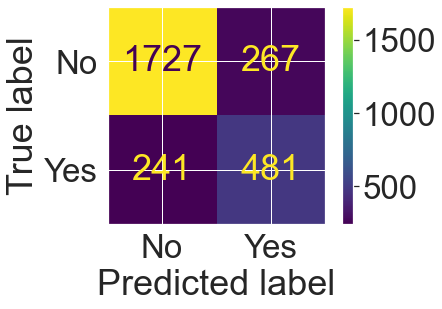

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute confusion matrix to evaluate the accuracy of a classification.
confusion_table = confusion_matrix(y_test, preds)

#Confusion Matrix visualization.
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_table,
                                    display_labels=['No', 'Yes'])
#create the plot
cm_display.plot()

#display the plot
plt.show()

In [55]:
from sklearn.metrics import f1_score

score = f1_score(y_test,preds,)

score 

0.6544217687074829

In [ ]:
!pip install imblearn

In [ ]:
import pickle as pkl

In [ ]:
pickle_out1=open("classifier2.pkl","wb")

In [ ]:
pkl.dump(classifier2,pickle_out1)

In [ ]:
pickle_out1.close()

In [ ]:
sklearn.__version__

In [ ]:
import sklearn

In [ ]:
sklea